# Analyzing Correlation in Movie Industry Data

In [3]:
# Import libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

# Adjust configuration of the plots
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

In [4]:
# Read in data
df = pd.read_csv(r'C:\Users\j9pin\Desktop\Portfolio Projects\Finished_Python Variable Correlation\movies.csv')

In [5]:
# Preview data
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## Step 1: Cleaning the Data

In [6]:
# Look for missing data in columns
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [7]:
# Drop rows with missing data
df = df.dropna()

In [8]:
# Recheck missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [9]:
# Look at data types in columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [10]:
# Reformat unnecessary floats as integers
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [11]:
# Create corrected year column by extracting year from "released" data
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

# Remove original "year" column
df.pop('year')

df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [12]:
# Sort by highest grossing films
df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [13]:
# Add scrolling to data view
pd.set_option('display.max_rows', None)

In [14]:
# Count unique "company" values and drop duplicates
df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
3330                          Zucker Brothers Productions
520                                      Zoetrope Studios
2213                                   Zeta Entertainment
3698                              Zentropa Entertainments
1180                                 Zenith Entertainment
5180                                      Zazen Produções
1321                             Zanuck/Brown Productions
1329                          Zacharias-Buhai Productions
789                             Young Sung Production Co.
5125                           Young Hannibal Productions
5499                                          Yellow Bird
4618          

In [15]:
# Preview cleaned up data to start analysis
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


## Step 2: Formulating a Hypothesis

Budget and company will have a high correlation to gross earnings.

<function matplotlib.pyplot.show(close=None, block=None)>

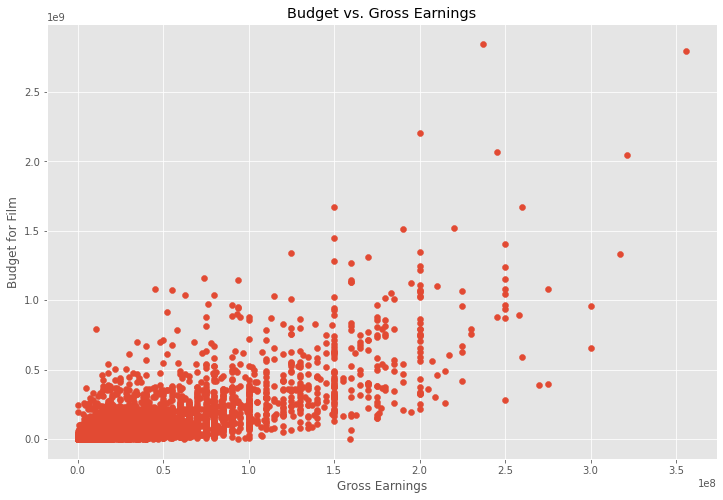

In [16]:
# Scatterplot with budget vs. gross revenu
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs. Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

plt.show

In [17]:
# Check that top grossing films match plot
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,2018


Text(0, 0.5, 'Budget for Film')

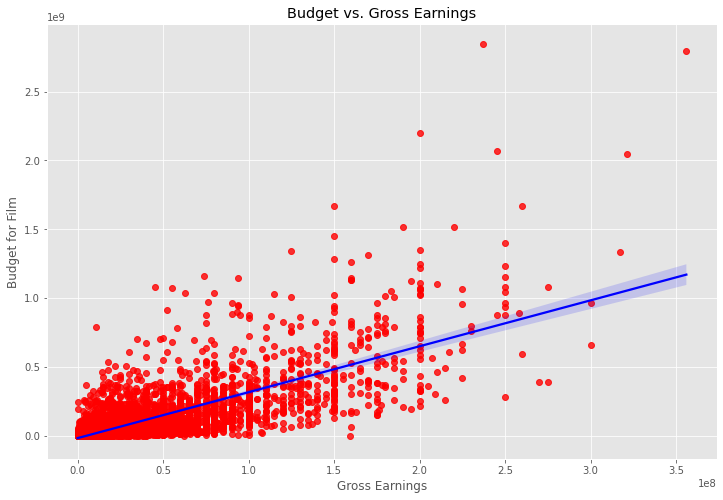

In [18]:
# Plot budget vs. gross using Seaborn
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.title('Budget vs. Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')

In [19]:
# Look at correlation (try pearson, kendall, spearman)
df.corr(method='pearson')

,score,votes,budget,gross,runtime,yearcorrect
score,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
yearcorrect,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


## Step 3: Identifying the Correlation

There is a high correlation between budget and gross earnings.

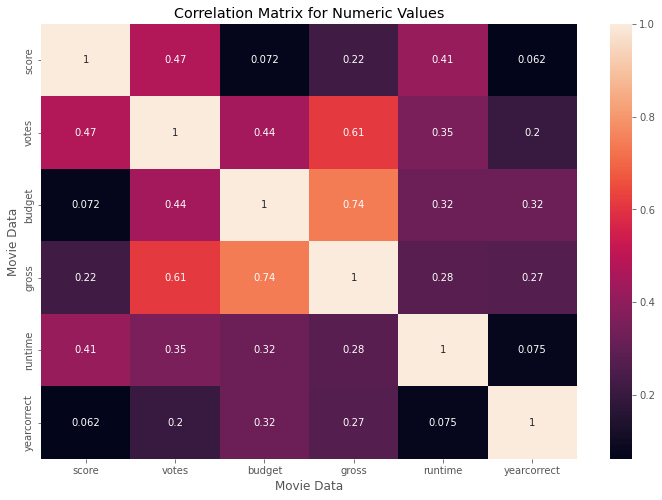

In [20]:
correlation_matrix = df.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric Values')
plt.xlabel('Movie Data')
plt.ylabel('Movie Data')

plt.show()

In [21]:
# Convert all data to numeric values for similar analysis
df_num = df

for col_name in df_num.columns:
    if(df_num[col_name].dtype == 'object'):
        df_num[col_name] = df_num[col_name].astype('category')
        df_num[col_name] = df_num[col_name].cat.codes
        
df_num.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,527,7.8,1100000,785,1263,1534,47,237000000,2847246203,1382,162,2009
7445,388,5,0,137,8.4,903000,105,513,1470,47,356000000,2797501328,983,181,2019
3045,4909,5,6,534,7.8,1100000,785,1263,1073,47,200000000,2201647264,1382,194,1997
6663,3643,5,0,529,7.8,876000,768,1806,356,47,245000000,2069521700,945,138,2015
7244,389,5,0,145,8.4,897000,105,513,1470,47,321000000,2048359754,983,149,2018


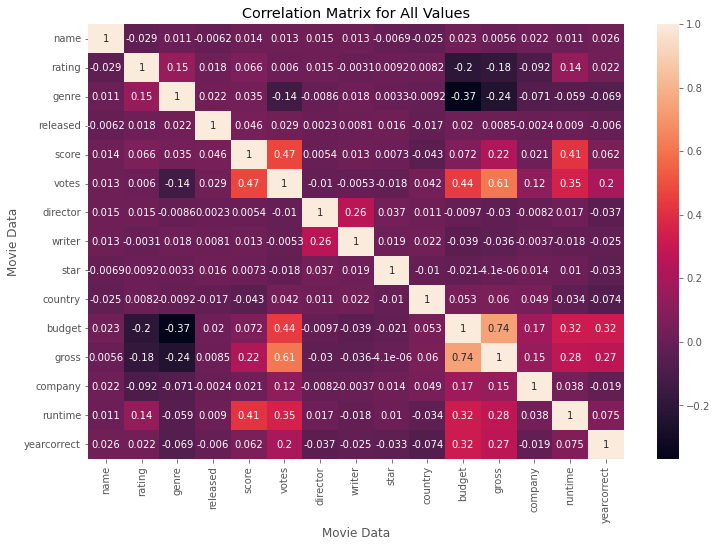

In [22]:
correlation_matrix = df_num.corr(method='pearson')
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for All Values')
plt.xlabel('Movie Data')
plt.ylabel('Movie Data')

plt.show()

In [23]:
# View updated matrix
df_num.corr()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
name,1.000000,-0.029234,0.010996,-0.006152,0.014450,0.012615,0.015246,0.012880,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850,0.025542
rating,-0.029234,1.000000,0.147796,0.018083,0.065983,0.006031,0.014656,-0.003149,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792,0.022021
genre,0.010996,0.147796,1.000000,0.022142,0.035106,-0.135990,-0.008553,0.017578,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237,-0.069147
released,-0.006152,0.018083,0.022142,1.000000,0.045874,0.028833,0.002308,0.008072,0.015706,-0.017228,0.019952,0.008501,-0.002407,0.008975,-0.005989
score,0.014450,0.065983,0.035106,0.045874,1.000000,0.474256,0.005413,0.012843,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068,0.061923
votes,0.012615,0.006031,-0.135990,0.028833,0.474256,1.000000,-0.010376,-0.005316,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303,0.203098
director,0.015246,0.014656,-0.008553,0.002308,0.005413,-0.010376,1.000000,0.261735,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433,-0.037371
writer,0.012880,-0.003149,0.017578,0.008072,0.012843,-0.005316,0.261735,1.000000,0.018520,0.022488,-0.039466,-0.035885,-0.003697,-0.017561,-0.025495
star,-0.006882,0.009196,0.003341,0.015706,0.007296,-0.017638,0.036593,0.018520,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108,-0.032687
country,-0.025490,0.008230,-0.009164,-0.017228,-0.043051,0.041551,0.011133,0.022488,-0.009990,1.000000,0.052977,0.060078,0.048569,-0.034477,-0.073569


In [24]:
# View correlations by data element
cmatrix = df_num.corr()
cpairs = cmatrix.unstack()

cpairs.head(50)

name      name           1.000000
          rating        -0.029234
          genre          0.010996
          released      -0.006152
          score          0.014450
          votes          0.012615
          director       0.015246
          writer         0.012880
          star          -0.006882
          country       -0.025490
          budget         0.023392
          gross          0.005639
          company        0.021697
          runtime        0.010850
          yearcorrect    0.025542
rating    name          -0.029234
          rating         1.000000
          genre          0.147796
          released       0.018083
          score          0.065983
          votes          0.006031
          director       0.014656
          writer        -0.003149
          star           0.009196
          country        0.008230
          budget        -0.203946
          gross         -0.181906
          company       -0.092357
          runtime        0.140792
          year

In [25]:
# Pair corrections
spairs = cpairs.sort_values()

spairs.head(50)

budget       genre         -0.368523
genre        budget        -0.368523
             gross         -0.244101
gross        genre         -0.244101
rating       budget        -0.203946
budget       rating        -0.203946
gross        rating        -0.181906
rating       gross         -0.181906
genre        votes         -0.135990
votes        genre         -0.135990
rating       company       -0.092357
company      rating        -0.092357
country      yearcorrect   -0.073569
yearcorrect  country       -0.073569
company      genre         -0.071334
genre        company       -0.071334
yearcorrect  genre         -0.069147
genre        yearcorrect   -0.069147
runtime      genre         -0.059237
genre        runtime       -0.059237
country      score         -0.043051
score        country       -0.043051
budget       writer        -0.039466
writer       budget        -0.039466
director     yearcorrect   -0.037371
yearcorrect  director      -0.037371
writer       gross         -0.035885
g

In [26]:
# Sort by values
high_corr = spairs[(spairs) > 0.5]

high_corr

votes        gross          0.614751
gross        votes          0.614751
budget       gross          0.740247
gross        budget         0.740247
name         name           1.000000
writer       writer         1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

## Declaring the Results

Company had little impact, but there is a high correlation between budget and votes to gross earnings.